In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('Training Data.csv')

In [2]:
df.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.shape

(252000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [7]:
label_encoder = LabelEncoder()

for col in ['Married/Single','Car_Ownership']:
    df[col] = label_encoder.fit_transform( df[col] )

In [8]:
pd.get_dummies(df, columns=["House_Ownership"])

,Id,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1,1303834,23,3,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,0,1
1,2,7574516,40,10,1,0,Software_Developer,Parbhani,Maharashtra,9,13,0,0,0,1
2,3,3991815,66,4,0,0,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,1
3,4,6256451,41,2,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,0,0,1
4,5,5768871,47,11,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,0,Surgeon,Kolkata,West_Bengal,6,11,0,0,0,1
251996,251997,2843572,26,10,1,0,Army_officer,Rewa,Madhya_Pradesh,6,11,0,0,0,1
251997,251998,4522448,46,7,1,0,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0,0,1
251998,251999,6507128,45,0,1,0,Graphic_Designer,Pondicherry,Puducherry,0,10,0,0,0,1


In [9]:
onehot_encoder = OneHotEncoder(sparse = False)
df['House_Ownership'] = onehot_encoder.fit_transform(df['House_Ownership'].values.reshape(-1, 1) )

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
high_card_features = ['Profession', 'CITY', 'STATE']

count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( df[high_card_features] )
df = df.join(count_encoded.add_suffix("_count"))

In [11]:
df= df.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_count,CITY_count,STATE_count
0,1,1303834,23,3,1,0.0,0,3,13,0,5217,798,14122
1,2,7574516,40,10,1,0.0,0,9,13,0,5053,849,25562
2,3,3991815,66,4,0,0.0,0,4,10,0,5195,688,5805
3,4,6256451,41,2,1,0.0,1,2,12,1,5053,607,4658
4,5,5768871,47,11,1,0.0,0,3,14,1,4413,809,16537


In [49]:
class LogisticRegressions:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
         
    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y, A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)
    
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

In [91]:
Y = df["Risk_Flag"].values.reshape(-1,1)
print (Y)
Y.shape

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


(252000, 1)

In [92]:
X = df.drop("Risk_Flag", axis=1).values
print (X)
X.shape

[[1.000000e+00 1.303834e+06 2.300000e+01 ... 5.217000e+03 7.980000e+02
  1.412200e+04]
 [2.000000e+00 7.574516e+06 4.000000e+01 ... 5.053000e+03 8.490000e+02
  2.556200e+04]
 [3.000000e+00 3.991815e+06 6.600000e+01 ... 5.195000e+03 6.880000e+02
  5.805000e+03]
 ...
 [2.519980e+05 4.522448e+06 4.600000e+01 ... 4.729000e+03 7.410000e+02
  2.556200e+04]
 [2.519990e+05 6.507128e+06 4.500000e+01 ... 5.166000e+03 8.970000e+02
  1.433000e+03]
 [2.520000e+05 9.070230e+06 7.000000e+01 ... 5.806000e+03 6.670000e+02
  1.653700e+04]]


(252000, 12)

In [93]:
# Initialize RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Example of using RandomUnderSampler for undersampling
undersampler = RandomUnderSampler(sampling_strategy=0.5)  # Sampling strategy specifies the desired ratio
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)
print('Undersampled dataset shape %s' % Counter(Y_resampled))


Undersampled dataset shape Counter({0: 61992, 1: 30996})


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=.2, random_state=41)

In [96]:
X_train_subset, y_train_subset = X_train[:10000], Y_train[:10000]
X_test_subset, y_test_subset = X_test[:10000], Y_test[:10000]

In [51]:
def confusion_matrix(y_actual, y_predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    epsilon = 1e-9
    for i in range(len(y_actual)):
        if y_actual[i] > 0:
            if y_actual[i] == y_predicted[i]:
                tp = tp + 1
            else:
                fn = fn + 1
        if y_actual[i] < 1:
            if y_actual[i] == y_predicted[i]:
                tn = tn + 1
            else:
                fp = fp + 1

    cm = [[tn, fp], [fn, tp]]
    accuracy = (tp+tn)/(tp+tn+fp+fn+epsilon)
    sens = tp/(tp+fn+epsilon)
    prec = tp/(tp+fp+epsilon)
    f_score = (2*prec*sens)/(prec+sens+epsilon)
    return cm,accuracy,sens,prec,f_score

In [97]:
regressor = LogisticRegressions(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train_subset, y_train_subset)
predictions = regressor.predict(X_test_subset)
cm ,accuracy,sens,precision,f_score  = confusion_matrix(np.asarray(y_test_subset), np.asarray(predictions))
print("Test accuracy: {0:.3f}".format(accuracy))
print("Confusion Matrix:",np.array(cm))

C:\Users\piyus\AppData\Local\Temp\ipykernel_3108\532374481.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Test accuracy: 0.667
Confusion Matrix: [[6654   19]
 [3314   13]]


In [101]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

recall = recall_score(y_test_subset, predictions)

# Calculate precision
precision = precision_score(y_test_subset, predictions)

# Calculate F1-score
f1 = f1_score(y_test_subset, predictions)

# Calculate AUC/ROC score (if your model outputs probabilities, not just predictions)
# Assuming regressor.predict_proba(X_test_subset) returns probabilities
# probabilities = regressor.predict_proba(X_test_subset)[:, 1]  # Assuming it's a binary classification
# auc_roc = roc_auc_score(y_test_subset, probabilities)

print("Recall: {0:.3f}".format(recall))
print("Precision: {0:.3f}".format(precision))
print("F1-score: {0:.3f}".format(f1))
# print("AUC/ROC: {0:.3f}".format(auc_roc))

Recall: 0.004
Precision: 0.406
F1-score: 0.008


In [102]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
probabilities = sigmoid(predictions)


In [103]:
auc_roc = roc_auc_score(y_test_subset, probabilities)

print("AUC/ROC: {0:.3f}".format(auc_roc))

AUC/ROC: 0.501


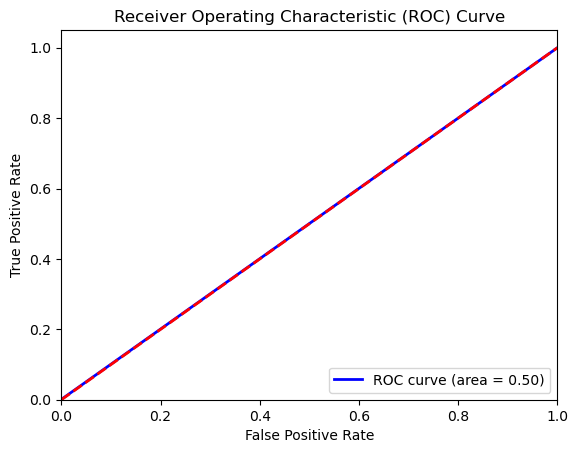

In [104]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Assuming probabilities contains the predicted probabilities for the positive class
# and y_test_subset contains the true labels for the test data
fpr, tpr, thresholds = roc_curve(y_test_subset, probabilities)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()